In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
EPOCHS = 20
BATCH_SIZE = 32
IMAGE_SIZE = 256

## Train dataset

In [3]:
train_datagen = ImageDataGenerator(
    rescale= 1.0/255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 12804 images belonging to 10 classes.


## Test Dataset

In [6]:
test_datagen = ImageDataGenerator(
    rescale= 1.0/255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 1610 images belonging to 10 classes.


## Val dataset

In [9]:
val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10
)

val_generator = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 1597 images belonging to 10 classes.


# Building the model

In [12]:
no_of_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 64)                33032256  
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 33,033,802
Trainable params: 33,033,802
Non-trainable params: 0
____________________________________________

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Training the model

In [15]:
hitory = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    batch_size=BATCH_SIZE,
    steps_per_epoch=int(12804/32),
    validation_steps=int(1597/32),
    verbose=1
)

Epoch 1/20
400/400 [==============================] - 172s 398ms/step - loss: 1.7963 - accuracy: 0.6659 - val_loss: 0.4812 - val_accuracy: 0.8412
Epoch 2/20
400/400 [==============================] - 149s 371ms/step - loss: 0.5154 - accuracy: 0.8283 - val_loss: 0.4684 - val_accuracy: 0.8476
Epoch 3/20
400/400 [==============================] - 147s 367ms/step - loss: 0.4268 - accuracy: 0.8526 - val_loss: 0.6241 - val_accuracy: 0.8099
Epoch 4/20
400/400 [==============================] - 143s 356ms/step - loss: 0.3807 - accuracy: 0.8745 - val_loss: 0.4625 - val_accuracy: 0.8406
Epoch 5/20
400/400 [==============================] - 141s 352ms/step - loss: 0.3560 - accuracy: 0.8789 - val_loss: 0.3992 - val_accuracy: 0.8629
Epoch 6/20
400/400 [==============================] - 141s 354ms/step - loss: 0.3377 - accuracy: 0.8857 - val_loss: 0.3547 - val_accuracy: 0.8769
Epoch 7/20
400/400 [==============================] - 141s 352ms/step - loss: 0.3386 - accuracy: 0.8870 - val_loss: 0.3625 -

In [21]:
scores = model.evaluate(test_generator)
scores

51/51 [==============================] - 18s 341ms/step - loss: 0.5973 - accuracy: 0.9124


[0.5972740650177002, 0.9124223589897156]

In [17]:

acc = hitory.history['accuracy']
val_acc = hitory.history['val_accuracy']

loss = hitory.history['loss']
val_loss = hitory.history['val_loss']

# Vizualizing Performance

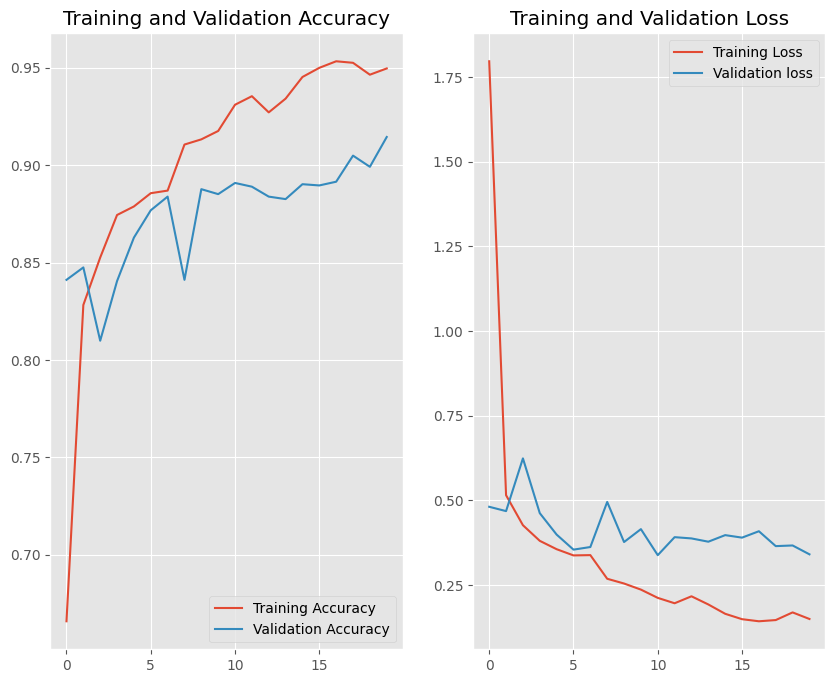

In [19]:
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.show()

## Checking some of the test samples

In [29]:
import numpy as np

class_names = list(train_generator.class_indices.keys())

def predict(model, img):
    
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


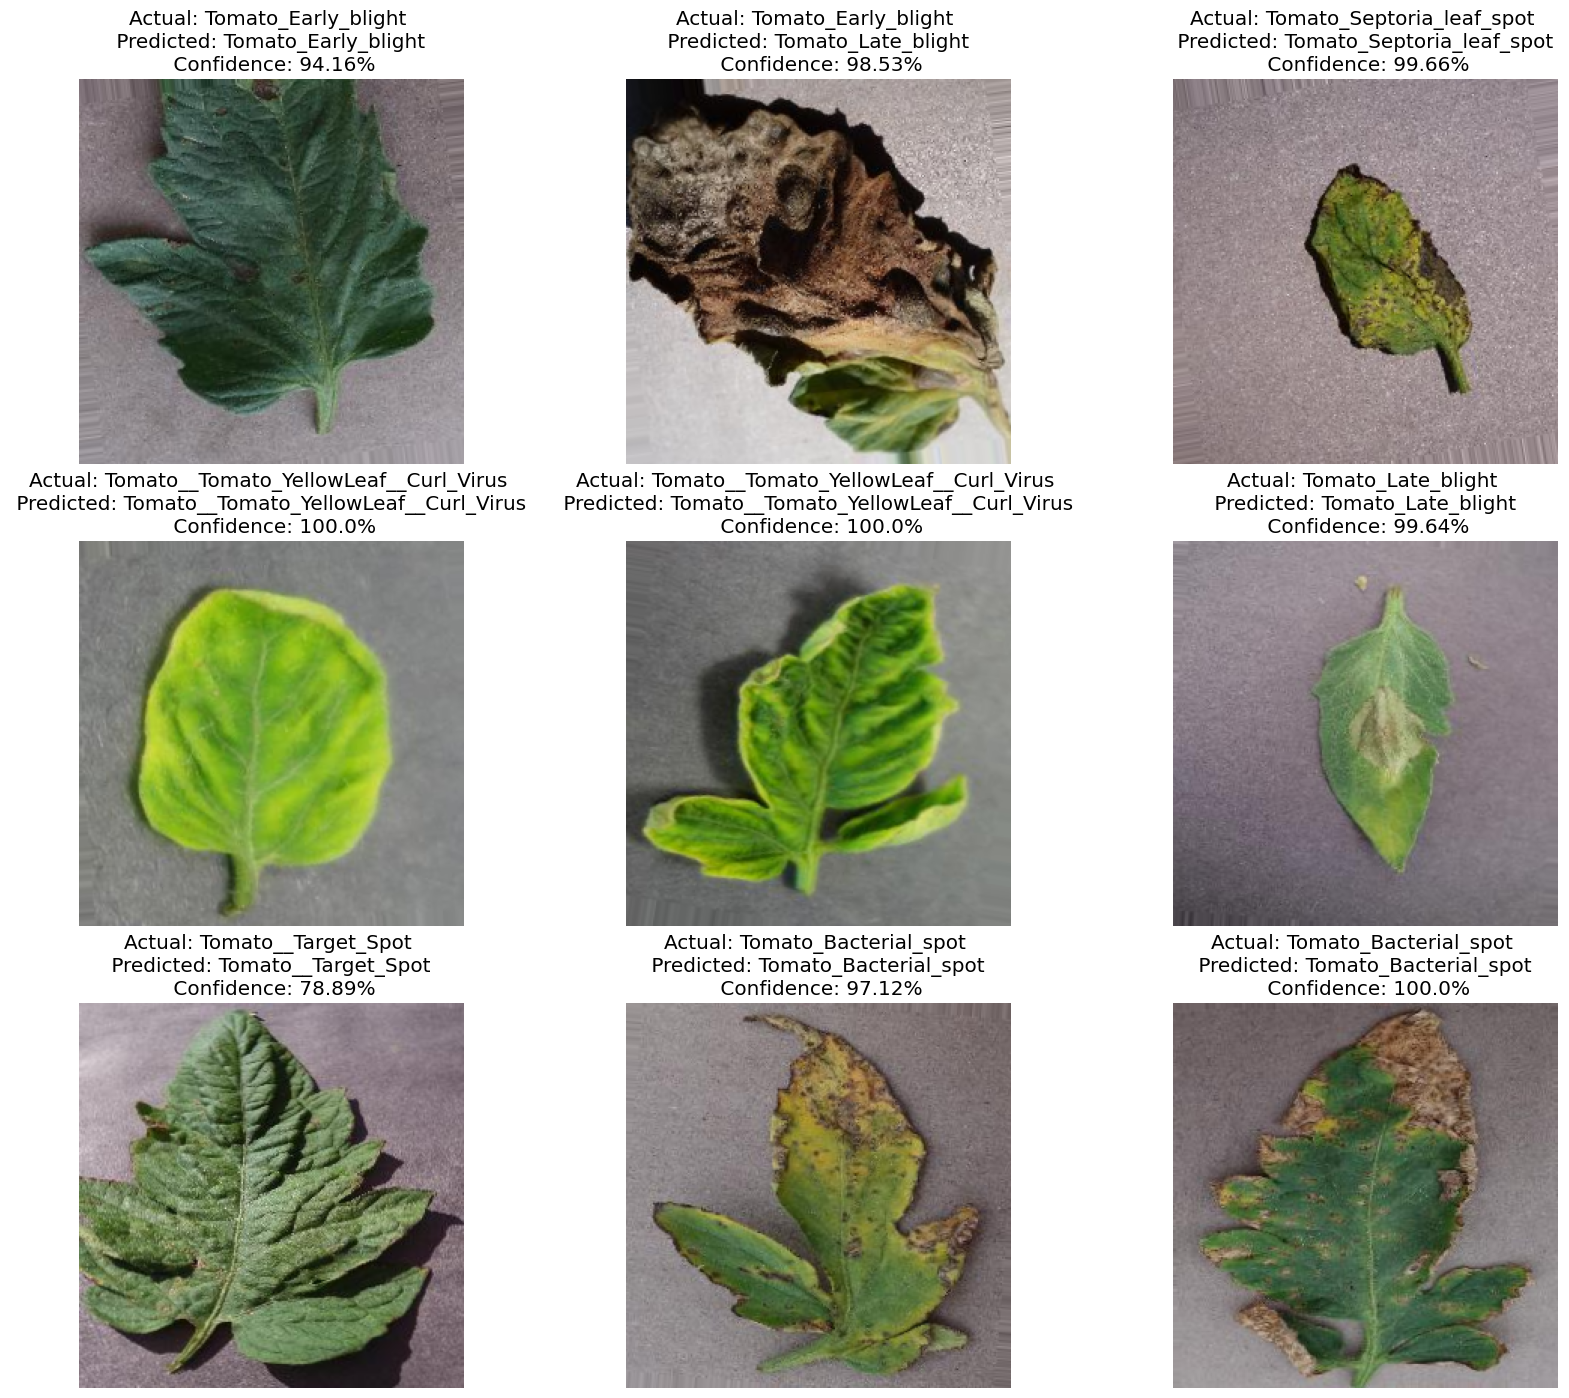

In [30]:
plt.figure(figsize=(20,17))

for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i])
        
        pred_class , conf = predict(model, images[i])
        real_class = class_names[int(labels[i])]
        #print(conf)
        
        plt.title(f"Actual: {real_class} \n Predicted: {pred_class} \n Confidence: {conf}%")
        plt.axis("off")
    break

# Saving 1st model

In [20]:
model.save("model_v1.h5")